<a href="https://colab.research.google.com/github/gulshaniitk/air-passengers-forecasting/blob/main/Airline_forecasting_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fbprophet

In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt 

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/forecasting/AirPassengers.csv')

data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)
data.tail()

,Month,#Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [ ]:
data.columns=['ds','y']
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


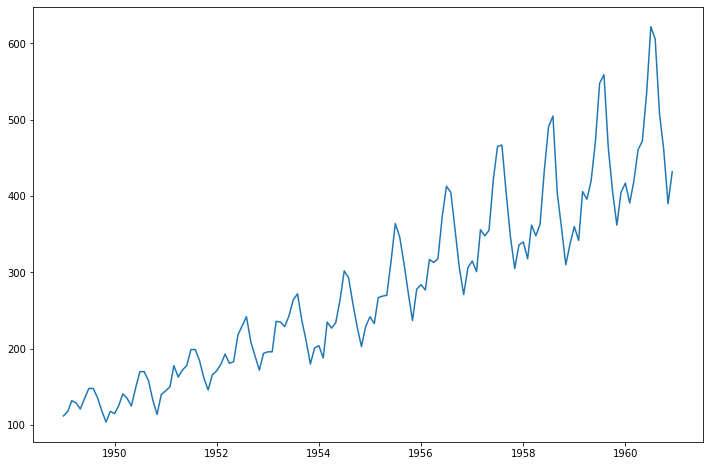

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(data.set_index(['ds']))

In [ ]:
train=data.iloc[:-30]
test=data.iloc[-30:]

In [ ]:
train.shape,test.shape

((114, 2), (30, 2))

In [ ]:
model=Prophet(interval_width=0.95)
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=30,freq='MS')
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
139,1960-08-01
140,1960-09-01
141,1960-10-01
142,1960-11-01


In [ ]:
forecast=model.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,109.293934,57.451550,124.924345,109.293934,109.293934,-19.062591,-19.062591,-19.062591,-19.062591,-19.062591,-19.062591,0.0,0.0,0.0,90.231344
1,1949-02-01,111.435049,50.177728,117.904245,111.435049,111.435049,-27.178507,-27.178507,-27.178507,-27.178507,-27.178507,-27.178507,0.0,0.0,0.0,84.256542
2,1949-03-01,113.368960,87.797568,153.807938,113.368960,113.368960,4.811408,4.811408,4.811408,4.811408,4.811408,4.811408,0.0,0.0,0.0,118.180368
3,1949-04-01,115.510074,78.111801,143.685001,115.510074,115.510074,-4.996437,-4.996437,-4.996437,-4.996437,-4.996437,-4.996437,0.0,0.0,0.0,110.513637
4,1949-05-01,117.582121,77.648888,144.644845,117.582121,117.582121,-6.111694,-6.111694,-6.111694,-6.111694,-6.111694,-6.111694,0.0,0.0,0.0,111.470427


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,1949-01-01,90.231344
1,1949-02-01,84.256542
2,1949-03-01,118.180368
3,1949-04-01,110.513637
4,1949-05-01,111.470427
...,...,...
139,1960-08-01,521.903086
140,1960-09-01,486.921334
141,1960-10-01,455.967679
142,1960-11-01,429.996939


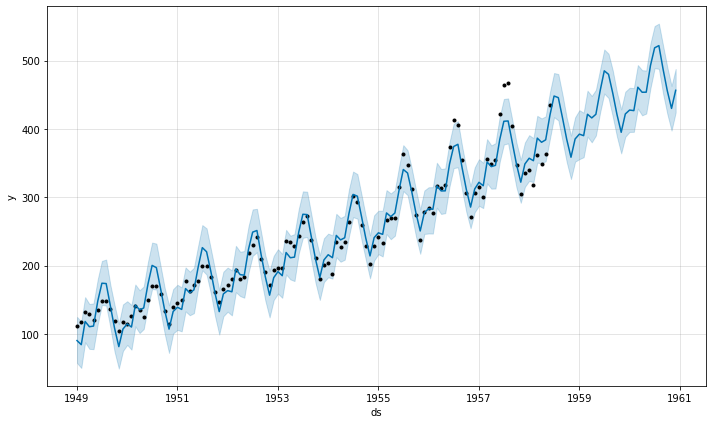

In [ ]:
fig1=model.plot(forecast)

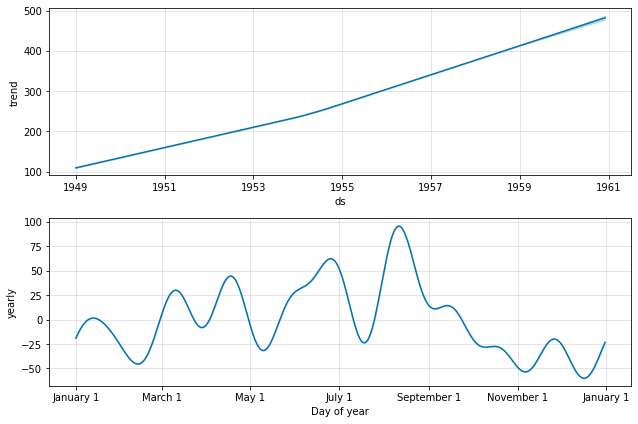

In [ ]:
fig2=model.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly
plot_plotly(model,forecast)

In [ ]:
from fbprophet.plot import plot_components_plotly
plot_components_plotly(model,forecast)

In [ ]:
from statsmodels.tools.eval_measures import rmse

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
predictions=forecast.iloc[-30:]['yhat']

In [ ]:
print('Root mean squared error : ', rmse(predictions,test['y']))
print('Mean value of test dataset : ', test['y'].mean())
print('Mean value of predictions dataset : ', predictions.mean())

Root mean squared error :  41.93644167327241
Mean value of test dataset :  442.0
Mean value of predictions dataset :  439.20929631561546
